# Coursework 1 Group (text)

Complete the following information

Group number: CW1 Group 4

Student names and k-numbers:
1. Bhumika Reddy Kurubarahalli Sudharshan (K2463984)
2. Pragati Priya (K2461276)
3. Reghuram Karunamurthi (K2446531)
4. Shreenidhi Dayanand Shetty (K2455943)






# Load Modules (code)


In [1]:
# Loading Modules

# Standard libraries
import numpy as np
import pandas as pd

# Third-party libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, balanced_accuracy_score, f1_score, roc_auc_score, accuracy_score, roc_curve, auc)

# Load Data (code)

In [2]:
# Loading Digits dataset

digits = load_digits()
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

# Classification

# Classification methods used (text)

Mention the classification methods used below. You should not describe them, but if they have not been discussed in the class, you should cite the source:


1. Decision Tree Classifier
2. Linear discriminant analysis (Kaggle,2024) (Ashraf, K. 2024)
3. Logistic Regression (Madecraft and Galarnyk M., 2020) (Geron, 2017)
4. Gaussian Naive Bayes (Analytics Vidhya, 2025) (Medium,2020)
5. Support Vector Machine
6. K-nearest neighbors (KNN) (Kaggle,2022) (Singh, B 2022)
7. Random Forest (Metric Coders 2024)
8. Quadratic Discriminant Analysis (Scikit Learn 2025)

## Training (code)

In [3]:


# ========================== #
# Decision Tree  #
# ========================== #

X_dt = digits.data
Y_dt = digits.target

# splitting training and testing data (80% train and 20% test)
X_dt_train, X_dt_test, Y_dt_train, Y_dt_test = train_test_split(X_dt, Y_dt, test_size=0.2, random_state=72, shuffle=True)

scaler = StandardScaler()
X_dt_train = scaler.fit_transform(X_dt_train)
X_dt_test = scaler.transform(X_dt_test)

model_dt = DecisionTreeClassifier() # (Scikit Learn 2025)

model_dt.fit(X_dt_train, Y_dt_train)

# Predictions
pred_dt = model_dt.predict(X_dt_test)
y_prob_dt = model_dt.predict_proba(X_dt_test)


# ========================== #
# Linear discriminant analysis  #
# ========================== #


X_lda = digits.data
Y_lda = digits.target
Y__lda_bin = label_binarize(Y_lda, classes=np.unique(Y_lda))

# splitting training and testing data (80% train and 20% test)
X__lda_train, X_lda_test, Y_lda_train, Y_lda_test, Y_lda_bin_train, Y_lda_bin_test = train_test_split(X_lda, Y_lda, Y__lda_bin, test_size=0.2, random_state=72, shuffle=True)

scaler = StandardScaler()
X__lda_train = scaler.fit_transform(X__lda_train)
X_lda_test = scaler.transform(X_lda_test)

model_lda = LinearDiscriminantAnalysis() #(Kaggle,2024) (Ashraf, K. 2024)

model_lda.fit(X__lda_train, Y_lda_train)

# Predictions
pred_lda = model_lda.predict(X_lda_test)
y_prob_lda = model_lda.predict_proba(X_lda_test)


# ========================== #
# Logistic Regression #
# ========================== #


df_lr = pd.DataFrame(digits.data, columns=digits.feature_names)
dir(digits)

X_lr = df_lr.loc[:, digits.feature_names].values
Y_lr = digits.target

#spliting traing and testing data
X_lr_train, X_lr_test, Y_lr_train, Y_lr_test = train_test_split(X_lr, Y_lr, test_size=0.2, random_state=72)

scaler_lr = StandardScaler()
X_lr_train = scaler_lr.fit_transform(X_lr_train)
X_lr_test = scaler_lr.transform(X_lr_test)

model_lr = LogisticRegression(max_iter=1000) #(Madecraft and Galarnyk M., 2020)(Geron, 2017)
model_lr.fit(X_lr_train, Y_lr_train)

# Predictions
y_prob_lr = model_lr.predict_proba(X_lr_test)
pred_lr = model_lr.predict(X_lr_test)


# ========================== #
# Gaussian Naive Bayes #
# ========================== #


df_gnb = pd.DataFrame(digits.data, columns=digits.feature_names)

X_gnb = df_gnb.loc[:, digits.feature_names].values
Y_gnb = digits.target

#spliting traing and testing data
X_gnb_train, X_gnb_test, Y_gnb_train, Y_gnb_test = train_test_split(X_gnb,Y_gnb, test_size=0.2, random_state=72)

model_gnb = GaussianNB() #(Scikit, 2025)
model_gnb.fit(X_gnb_train, Y_gnb_train)

# Predictions
y_prob_gnb = model_gnb.predict_proba(X_gnb_test)
pred_gnb = model_gnb.predict(X_gnb_test)


# ========================== #
# Support Vector Machine #
# ========================== #


# selecting features and target
X_svm = digits.data
Y_svm = digits.target

# splting traning and testing data (80% train and 20% test)
X_svm_train, X_svm_test, Y_svm_train, Y_svm_test = train_test_split(X_svm, Y_svm, test_size=0.2, random_state=72)

model_svm = svm.SVC(gamma=0.001, probability=True) # (Scikit,2025)

model_svm.fit(X_svm_train, Y_svm_train)

# Predictions
pred_svm = model_svm.predict(X_svm_test)
y_prob = model_svm.predict_proba(X_svm_test)


# ========================== #
# K-nearest neighbors (KNN) #
# ========================== #


X_knn = digits.data
Y_knn = digits.target

# Splting traning and testing data (80% train and 20% test)
X_knn_train, X_knn_test, Y_knn_train, Y_knn_test = train_test_split(X_knn, Y_knn, test_size=0.2, random_state=72, shuffle=True)

scaler = StandardScaler()
X_knn_train = scaler.fit_transform(X_knn_train)
X_knn_test = scaler.transform(X_knn_test)

k = 5
model_knn = KNeighborsClassifier(n_neighbors=k) #(Kaggle,2022) (Singh, B 2022)

# Fit the model
model_knn.fit(X_knn_train, Y_knn_train)

# Predictions
pred_knn = model_knn.predict(X_knn_test)
y_prob = model_knn.predict_proba(X_knn_test)


# ========================== #
# Random Forest #
# ========================== #


X_rf = digits.data
Y_rf = digits.target

# Splitting training and testing data (80% train and 20% test)
X_rf_train, X_rf_test, Y_rf_train, Y_rf_test = train_test_split(X_rf, Y_rf, test_size=0.2, random_state=72)

model_rf = RandomForestClassifier(random_state=72) # (Metric Coders 2024)

model_rf.fit(X_rf_train, Y_rf_train)

# Predictions
pred_rf = model_rf.predict(X_rf_test)
y_prob = model_rf.predict_proba(X_rf_test)


# ========================== #
# Quadratic Discriminant Analysis #
# ========================== #


X_qda = digits.data
Y_qda = digits.target

# Splitting training and testing data (80% train and 20% test)
X_qda_train, X_qda_test, Y_qda_train, Y_qda_test = train_test_split(X_qda, Y_qda, test_size=0.2, random_state=72)

scaler = StandardScaler()
X_qda_train = scaler.fit_transform(X_qda_train)
X_qda_test = scaler.transform(X_qda_test)

model_qda = QuadraticDiscriminantAnalysis(reg_param=0.1)

model_qda.fit(X_qda_train, Y_qda_train)

# Predictions
pred_qda = model_qda.predict(X_qda_test)
y_prob_qda = model_qda.predict_proba(X_qda_test)

print("#" + "=" * 25 + "#")
print("# All models are trained #")
print("#" + "=" * 25 + "#")


#=========================#
# All models are trained #
#=========================#


## Evaluation (code)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


                     Decision Tree                     
Metric                   Default        Optimized      
-------------------------------------------------------
Balanced Accuracy        0.8864         0.8774         
ROC-AUC Score            0.9370         0.9360         


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Parameters: {'shrinkage': 'auto', 'solver': 'lsqr'}


             Linear discriminant analysis              
Metric                   Default        Optimized      
-------------------------------------------------------
Balanced Accuracy        0.9457         0.9545         
ROC-AUC Score            0.9968         0.9972         


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Parameters: {'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'sa

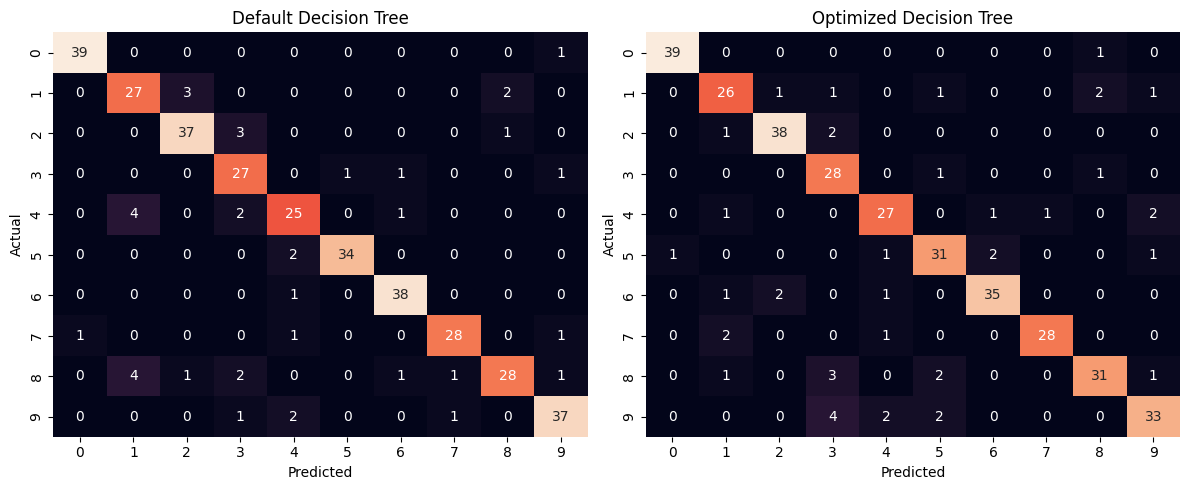

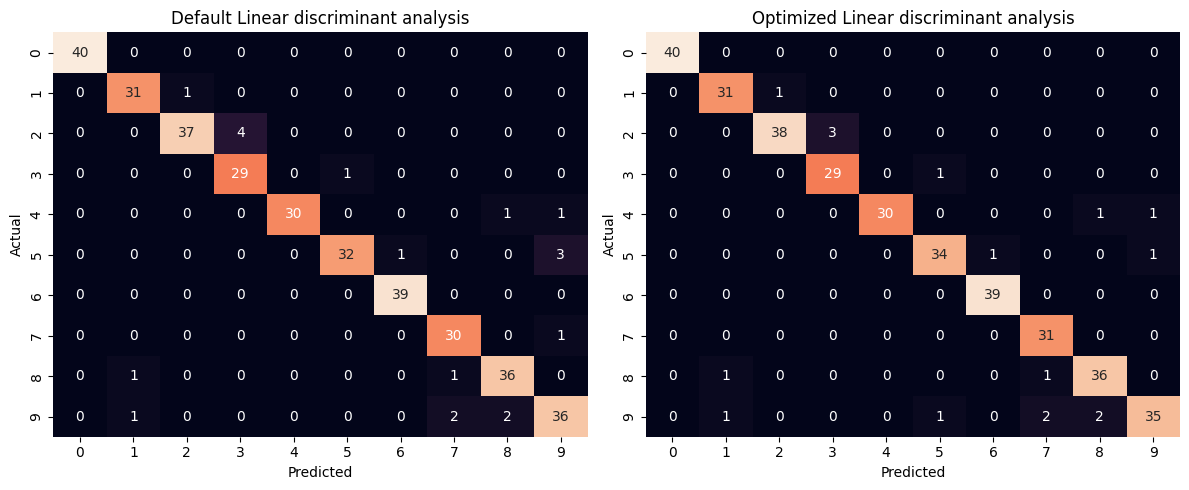

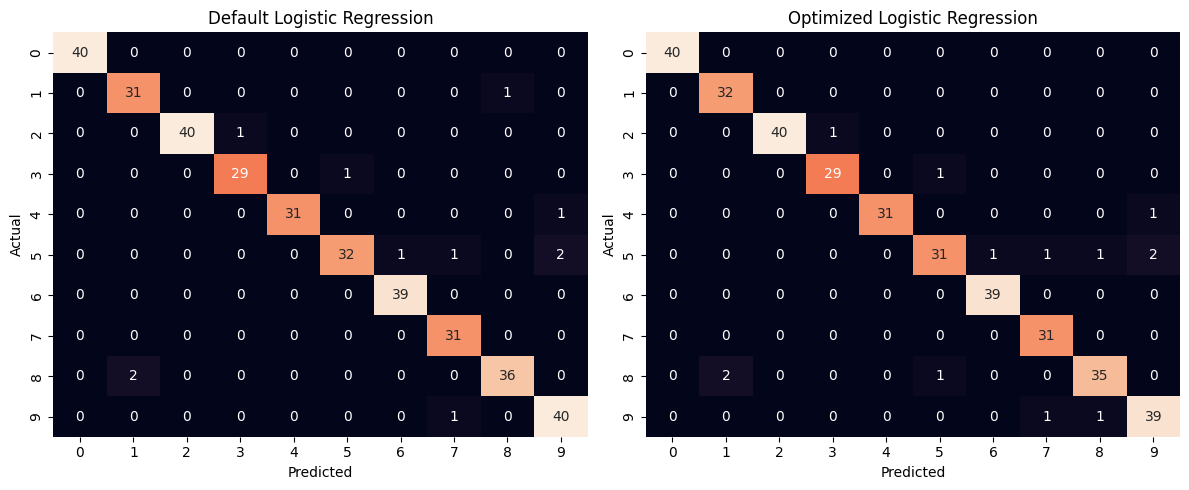

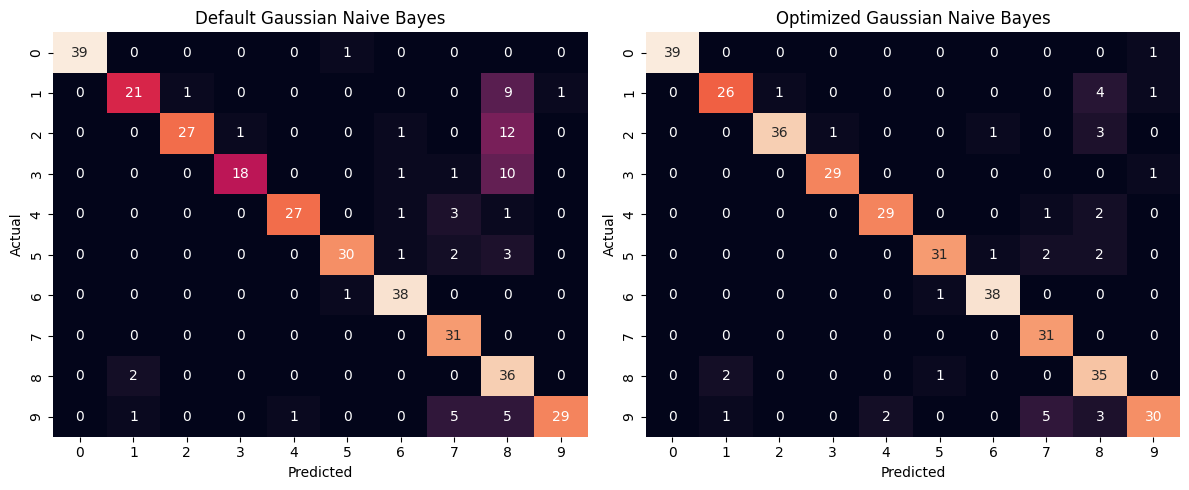

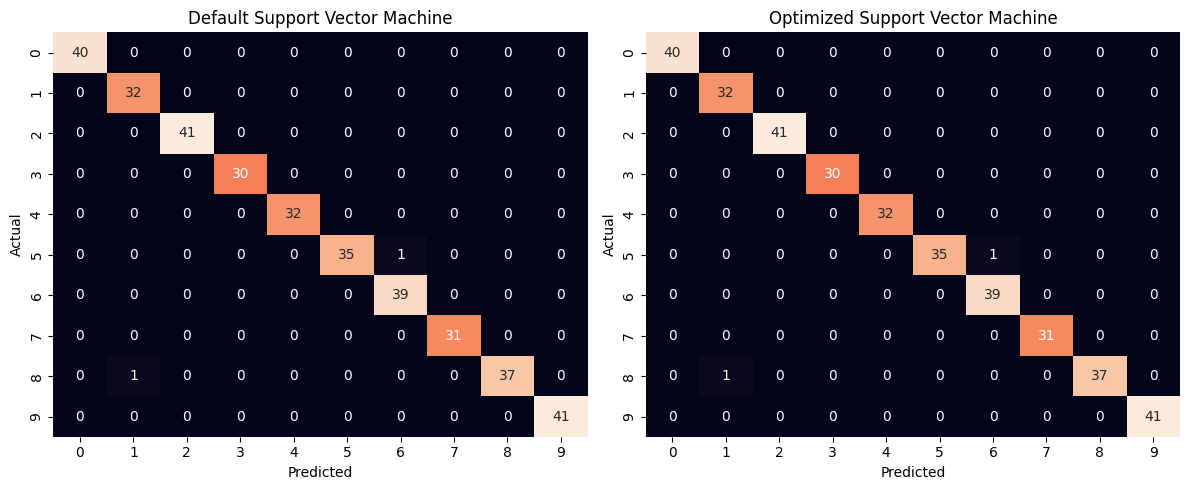

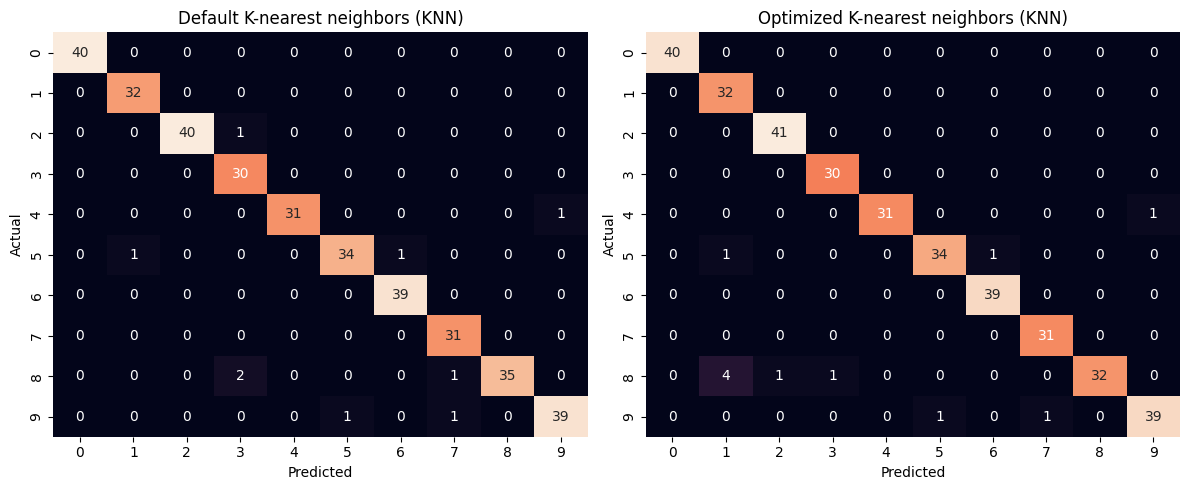

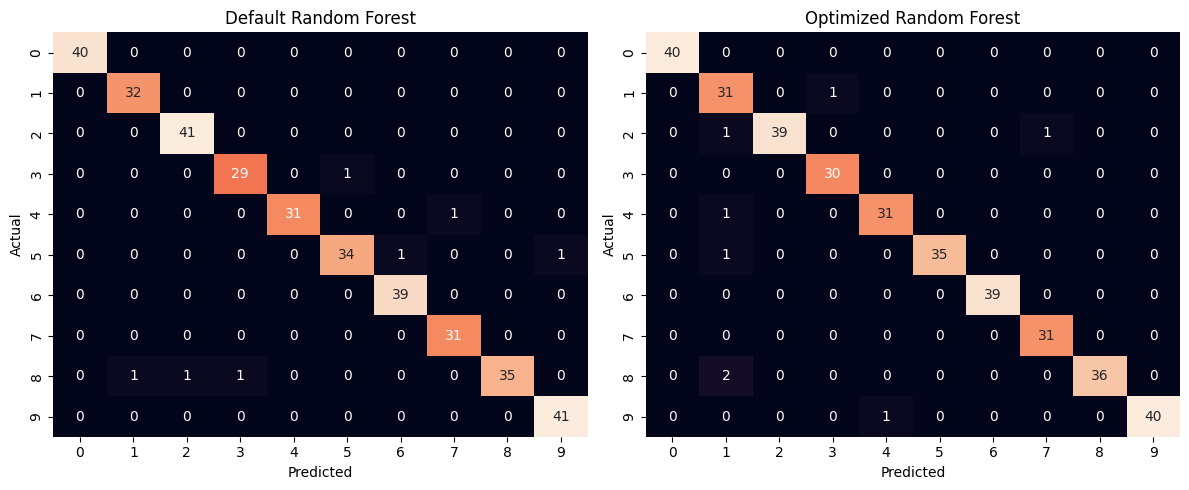

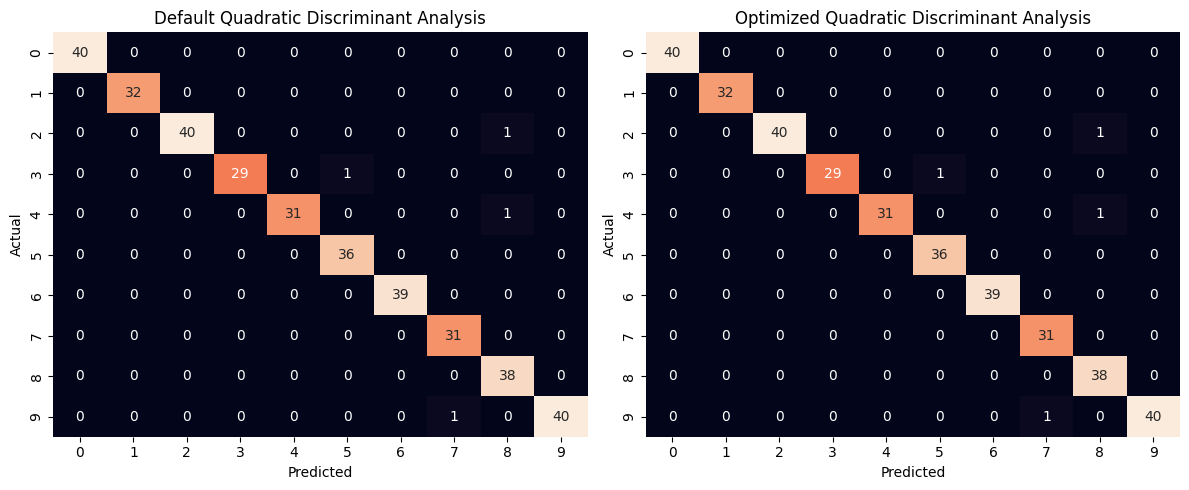

#=========================#
# ROC Curve #
#=========================#


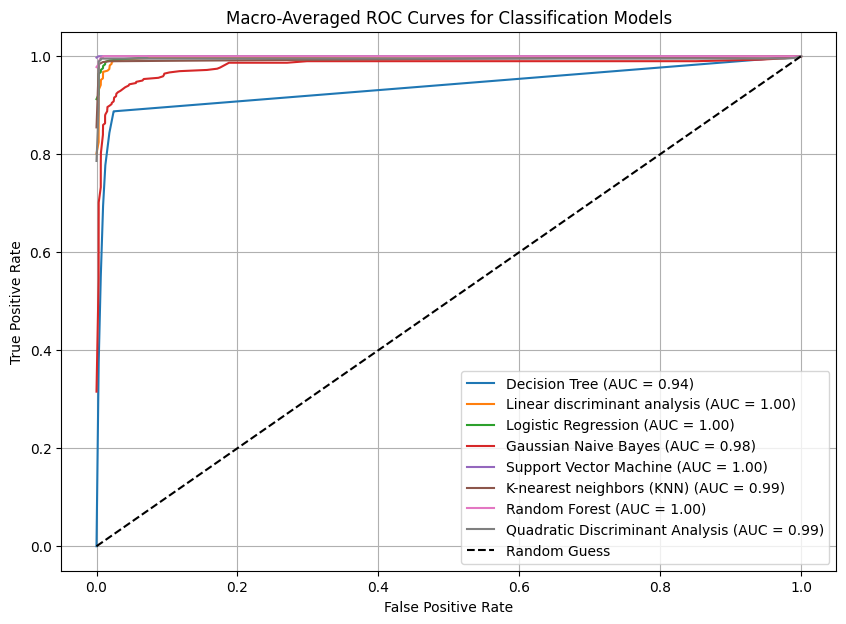

In [4]:
# ========================== #
# Decision Tree  #
# ========================== #

# Balanced Accuracy and ROC_AUC score for default parameters
bal_acc_dt = balanced_accuracy_score(Y_dt_test, pred_dt) #(Scikit,2025)
roc_dt = roc_auc_score(Y_dt_test, y_prob_dt, multi_class="ovr", average="macro") #(Scikit,2025)

# Hyperparameter tuning using gridsearchcv  (Machine Learning Mastery, 2020) (Brownlee, J 2020)
param_grid_dr = {  #
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_dr = GridSearchCV(DecisionTreeClassifier(random_state=72), param_grid_dr, cv=5, scoring="balanced_accuracy", verbose=1)
grid_search_dr.fit(X_dt_train, Y_dt_train)

best_dt = grid_search_dr.best_estimator_
print(f"Parameters: {grid_search_dr.best_params_}")
print("\n")

optimal_model_dr = DecisionTreeClassifier(**grid_search_dr.best_params_, random_state=72)
optimal_model_dr.fit(X_dt_train, Y_dt_train)

optimal_pred_dr = optimal_model_dr.predict(X_dt_test)
optimal_prob_dr = optimal_model_dr.predict_proba(X_dt_test)

# Balanced Accuracy and ROC_AUC score for Optimal parameters
optimal_bal_acc_dt = balanced_accuracy_score(Y_dt_test, optimal_pred_dr)
optimal_roc_auc_score_dt = roc_auc_score(Y_dt_test, optimal_prob_dr, multi_class='ovr', average='macro')

title = "Decision Tree"
width = 55

print(f"{title:^{width}}")
print("=" * width)
print(f"{'Metric':<25}{'Default':<15}{'Optimized':<15}")
print("-" * width)
print(f"{'Balanced Accuracy':<25}{bal_acc_dt:<15.4f}{optimal_bal_acc_dt:<15.4f}")
print(f"{'ROC-AUC Score':<25}{roc_dt:<15.4f}{optimal_roc_auc_score_dt:<15.4f}")
print("=" * width)
print("\n")

# ========================== #
# Linear discriminant analysis  #
# ========================== #

# Balanced Accuracy and ROC_AUC score for default parameters
bal_acc_lda = balanced_accuracy_score(Y_lda_test, pred_lda) #measuring balanced accuracy (Scikit,2025)
roc_lda = roc_auc_score(Y_lda_test, y_prob_lda, multi_class="ovr", average="macro") #calculating ROC score (SciKit,2025)

# Hyperparameter tuning using gridsearchcv (Kaggle,2019) (Hernández, J. 2019)
param_grid = [
    {"solver": ["svd"]},
    {"solver": ["lsqr", "eigen"], "shrinkage": ["auto"]}  # Including shrinkage parameter
]

grid_search_lda = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=5, scoring="balanced_accuracy", verbose=1)
grid_search_lda.fit(X__lda_train, Y_lda_train)

print(f"Parameters: {grid_search_lda.best_params_}")
print("\n")

best_lda = grid_search_lda.best_estimator_
best_lda.fit(X__lda_train, Y_lda_train)

optimal_pred_lda = best_lda.predict(X_lda_test)
optimal_prob_lda = best_lda.predict_proba(X_lda_test)

# Balanced Accuracy and ROC_AUC score for Optimal parameters
optimal_bal_acc_lda = balanced_accuracy_score(Y_lda_test, optimal_pred_lda)
optimal_roc_lda = roc_auc_score(Y_lda_bin_test, optimal_prob_lda, multi_class='ovr',average="macro")


title = "Linear discriminant analysis"
width = 55

print(f"{title:^{width}}")
print("=" * width)
print(f"{'Metric':<25}{'Default':<15}{'Optimized':<15}")
print("-" * width)
print(f"{'Balanced Accuracy':<25}{bal_acc_lda:<15.4f}{optimal_bal_acc_lda:<15.4f}")
print(f"{'ROC-AUC Score':<25}{roc_lda:<15.4f}{optimal_roc_lda:<15.4f}")
print("=" * width)
print("\n")


# ========================== #
# Logistic Regression #
# ========================== #

# Balanced Accuracy and ROC_AUC score for default parameters
bal_acc_lr = balanced_accuracy_score(Y_lr_test, pred_lr) #measuring balanced accuracy (Scikit,2025)
f1_check_lr = f1_score(Y_lr_test, pred_lr, average="weighted") #measuring F1 score (Scikit,2025)
roc_lr = roc_auc_score(Y_lr_test, y_prob_lr, multi_class="ovr", average="macro") #calculating ROC score (SCIKIT,2025)

# Hypertuning parameters using GridSearchCV (Scikit,2025)(Geron, 2017)
param_grid = {
    "C": [1, 10, 100],
    "penalty": ["l1", "l2"], #Certain hyperparameters, such as elasticnet and none for the penalty parameter, were excluded from the tuning process due to their incompatibility with specific solvers in the logistic regression implementation. Additionally, these parameters were omitted to optimize computational efficiency, as their inclusion would significantly increase the computational complexity and runtime of the hyperparameter search process while not contributing to accuracy improvement
    "solver": ["saga"], #solver compatible with l1 and l2
    "max_iter": [10000] #Setting a high number to allow the algorithm enough iterations to give optimal sets of parameters

}

grid_search_lr = GridSearchCV(model_lr, param_grid= param_grid, cv=5, verbose=True)
grid_search_lr.fit(X_lr_train, Y_lr_train)

print("Parameters:", grid_search_lr.best_params_)
print("\n")

optimal_model_lr = grid_search_lr.best_estimator_
optimal_model_lr.fit(X_lr_train, Y_lr_train)

optimal_pred_lr = optimal_model_lr.predict(X_lr_test)
optimal_prob_lr = optimal_model_lr.predict_proba(X_lr_test)

# Balanced Accuracy and ROC_AUC score for Optimal parameters
optimal_bal_acc_lr = balanced_accuracy_score(Y_lr_test, optimal_pred_lr)
roc_optimal_lr = roc_auc_score(Y_lr_test, optimal_prob_lr, multi_class="ovr", average="macro")

title = "Logistic Regression"
width = 55

print(f"{title:^{width}}")
print("=" * width)
print(f"{'Metric':<25}{'Default':<15}{'Optimized':<15}")
print("-" * width)
print(f"{'Balanced Accuracy':<25}{bal_acc_lr:<15.4f}{optimal_bal_acc_lr:<15.4f}")
print(f"{'ROC-AUC Score':<25}{roc_lr:<15.4f}{roc_optimal_lr:<15.4f}")
print("=" * width)
print("\n")

# ========================== #
# Gaussian Naive Bayes #
# ========================== #

# Balanced Accuracy and ROC_AUC score for default parameters
bal_acc_gnb = balanced_accuracy_score(Y_gnb_test, pred_gnb) #evaluating balanced accuracy (Scikit, 2025)
roc_gnb = roc_auc_score(Y_gnb_test, y_prob_gnb, multi_class="ovr", average="macro") #calculating ROC score, using one-vs rest approach to calculate one class against all other classes (Scikit, 2025)

# Hyperparamter tuning to find optimal parameters (Scikit, 2025)
param_grid = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5], #to increase stability
              "priors": [None],} #since the dataset is appromximately balanced, I opted to not specify prior probabilities as its almost equal for each class. Aditionally, specifiying prior probabilites yields the same result as deafualt priors obtained from training the data. This suggests that the parameter is already optimal and does not need to be tuned

grid_search = GridSearchCV(model_gnb, param_grid, cv=5, verbose=True)
grid_search.fit(X_gnb_train, Y_gnb_train)
print("Parameters: ", grid_search.best_params_)
print("\n")

optimal_model_gnb = grid_search.best_estimator_
optimal_model_gnb.fit(X_gnb_train, Y_gnb_train)

optimal_pred_gnb = optimal_model_gnb.predict(X_gnb_test)
optimal_prob_gnb = optimal_model_gnb.predict_proba(X_gnb_test)

# Balanced Accuracy and ROC_AUC score for Optimal parameters
optimal_bal_acc_gnb = balanced_accuracy_score(Y_gnb_test, optimal_pred_gnb)
optimal_roc_auc_score_gnb = roc_auc_score(Y_gnb_test, optimal_prob_gnb, multi_class="ovr", average="macro")

title = "Gaussian Naive Bayes"
width = 55

print(f"{title:^{width}}")
print("=" * width)
print(f"{'Metric':<25}{'Default':<15}{'Optimized':<15}")
print("-" * width)
print(f"{'Balanced Accuracy':<25}{bal_acc_gnb:<15.4f}{optimal_bal_acc_gnb:<15.4f}")
print(f"{'ROC-AUC Score':<25}{roc_gnb:<15.4f}{optimal_roc_auc_score_gnb:<15.4f}")
print("=" * width)
print("\n")


# ========================== #
# Support Vector Machine #
# ========================== #

# Balanced Accuracy and ROC_AUC score for default parameters
bal_acc_svm = metrics.balanced_accuracy_score(Y_svm_test, pred_svm) #(Scikit,2025)
roc_svm = metrics.roc_auc_score(Y_svm_test, y_prob, multi_class="ovr", average="macro") #(Scikit,2025)

# Hyperparamter tuning to find optimal parameters (Scikit,2025)
param_grid = {
    "C": [0.1, 1, 10, 100],  # Regularization strength
    "gamma": [0.01, 0.001, 0.0001],  # Kernel coefficient
    "kernel": ["rbf"]  # Using Radial Basis Function (RBF) kernel
}

grid_search_svm = GridSearchCV(svm.SVC(probability=True), param_grid, cv=5, scoring="accuracy", verbose=1)
grid_search_svm.fit(X_svm_train, Y_svm_train)
print(f"Best Parameters: {grid_search_svm.best_params_}")
print("\n")


best_C = grid_search_svm.best_params_["C"] # Choosing the best C from after running the hyperparameter tuning
best_gamma = grid_search_svm.best_params_["gamma"]  # Choosing the best gamma from after running the hyperparameter tuning 

optimal_model_svm = svm.SVC(C=best_C, gamma=best_gamma, kernel="rbf", probability=True)
optimal_model_svm.fit(X_svm_train, Y_svm_train)

optimal_pred_svm = optimal_model_svm.predict(X_svm_test)
optimal_prob_svm = optimal_model_svm.predict_proba(X_svm_test)

# Balanced Accuracy and ROC_AUC score for Optimal parameters
optimal_bal_acc_svm = balanced_accuracy_score(Y_svm_test, optimal_pred_svm)
optimal_roc_auc_score_svm = roc_auc_score(Y_svm_test, optimal_prob_svm, multi_class="ovr", average="macro")

title = "Support Vector Machine"
width = 55

print(f"{title:^{width}}")
print("=" * width)
print(f"{'Metric':<25}{'Default':<15}{'Optimized':<15}")
print("-" * width)
print(f"{'Balanced Accuracy':<25}{bal_acc_svm:<15.4f}{optimal_bal_acc_svm:<15.4f}")
print(f"{'ROC-AUC Score':<25}{roc_svm:<15.4f}{optimal_roc_auc_score_svm:<15.4f}")
print("=" * width)
print("\n")


# ========================== #
# K-nearest neighbors (KNN) #
# ========================== #

# Balanced Accuracy and ROC_AUC score for default parameters
bal_acc_knn = balanced_accuracy_score(Y_knn_test, pred_knn) #(Scikit,2025)
roc_knn = roc_auc_score(Y_knn_test, y_prob, multi_class="ovr", average="macro") #(Scikit,2025)

# Hyperparameter tuning using gridsearchcv (Agrawal, S. 2023)
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],  # Number of neighbors
    "weights": ["uniform", "distance"],  # Voting strategy
    "metric": ["euclidean", "manhattan", "minkowski"]  # Distance metric
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="balanced_accuracy", verbose=1)
grid_search_knn.fit(X_knn_train, Y_knn_train)
print(f"Best KNN Parameters: {grid_search_knn.best_params_}")
print("\n")

best_k = grid_search_knn.best_params_["n_neighbors"]  
best_weights = grid_search_knn.best_params_["weights"]
best_metric = grid_search_knn.best_params_["metric"]

optimal_model_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights, metric=best_metric)
optimal_model_knn.fit(X_knn_train, Y_knn_train)

optimal_pred_knn = optimal_model_knn.predict(X_knn_test)
optimal_prob_knn = optimal_model_knn.predict_proba(X_knn_test)

# Balanced Accuracy and ROC_AUC score for Optimal parameters
bal_acc_optimized = accuracy_score(Y_knn_test, optimal_pred_knn)
roc_auc_optimized = roc_auc_score(Y_knn_test, optimal_prob_knn, multi_class="ovr")

title = "K-nearest neighbors"
width = 55

print(f"{title:^{width}}")
print("=" * width)
print(f"{'Metric':<25}{'Default':<15}{'Optimized':<15}")
print("-" * width)
print(f"{'Balanced Accuracy':<25}{bal_acc_knn:<15.4f}{bal_acc_optimized:<15.4f}")
print(f"{'ROC-AUC Score':<25}{roc_knn:<15.4f}{roc_auc_optimized:<15.4f}")
print("=" * width)
print("\n")


# ========================== #
# Random Forest #
# ========================== #

# Balanced Accuracy and ROC_AUC score for default parameters
bal_acc_rf =balanced_accuracy_score(Y_rf_test, pred_rf)
roc_rf = roc_auc_score(Y_rf_test, y_prob, multi_class="ovr", average="macro")

# Hyperparameter tuning using gridsearchcv (GeeksForeeks, 2025)
param_grid_rf = {
    'n_estimators': [100],                 
    'max_depth': [None, 10],              
    'min_samples_split': [2],              
    'min_samples_leaf': [1],               
    'criterion': ['gini'],                
    'max_features': [None],    
    'bootstrap': [True]                        
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=72), param_grid_rf, cv=5, scoring="balanced_accuracy", verbose=1)
grid_search_rf.fit(X_rf_train, Y_rf_train)

print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print("\n")

optimal_model_rf = grid_search_rf.best_estimator_
optimal_model_rf.fit(X_rf_train, Y_rf_train)

optimal_pred_rf = optimal_model_rf.predict(X_rf_test)
optimal_prob_rf = optimal_model_lr.predict_proba(X_rf_test)

# Balanced Accuracy and ROC_AUC score for Optimal parameters
roc_optimal_rf = roc_auc_score(Y_rf_test, optimal_prob_rf, multi_class="ovr", average="macro")
optimal_bal_acc_rf = balanced_accuracy_score(Y_rf_test, optimal_pred_rf)

title = "Random Forest"
width = 55

print(f"{title:^{width}}")
print("=" * width)
print(f"{'Metric':<25}{'Default':<15}{'Optimized':<15}")
print("-" * width)
print(f"{'Balanced Accuracy':<25}{bal_acc_rf:<15.4f}{optimal_bal_acc_rf:<15.4f}")
print(f"{'ROC-AUC Score':<25}{roc_rf:<15.4f}{roc_optimal_rf:<15.4f}")
print("=" * width)
print("\n")

# ========================== #
# Quadratic Discriminant Analysis #
# ========================== #

# Balanced Accuracy and ROC_AUC score for default parameters
bal_acc_qda = balanced_accuracy_score(Y_qda_test, pred_qda)
roc_qda = roc_auc_score(Y_qda_test, y_prob_qda, multi_class="ovr", average="macro")

# Hyperparameter tuning using gridsearchcv (Katsu, 2019)
param_grid = {
    "reg_param": [0.1, 0.5, 1.0],  # Testing different regularization values
    "tol": [1e-4, 1e-3, 1e-2]  # Testing different tolerance values
}

grid_search_qda = GridSearchCV(QuadraticDiscriminantAnalysis(), param_grid, cv=5, scoring="balanced_accuracy", verbose=1)
grid_search_qda.fit(X_qda_train, Y_qda_train)
print(f"Best QDA Parameters: {grid_search_qda.best_params_}")
print("\n")

best_reg_param = grid_search_qda.best_params_["reg_param"]
best_tol = grid_search_qda.best_params_["tol"]

optimal_model_qda = QuadraticDiscriminantAnalysis(reg_param=best_reg_param, tol=best_tol)
optimal_model_qda.fit(X_qda_train, Y_qda_train)

optimal_pred_qda = optimal_model_qda.predict(X_qda_test)
optimal_prob_qda = optimal_model_qda.predict_proba(X_qda_test)

# Balanced Accuracy and ROC_AUC score for Optimal parameters
bal_acc_optimized_qda = accuracy_score(Y_qda_test, optimal_pred_qda)
roc_auc_optimized_qda = roc_auc_score(Y_qda_test, optimal_prob_qda, multi_class="ovr")

title = "Quadratic Discriminant Analysis"
width = 55

print(f"{title:^{width}}")
print("=" * width)
print(f"{'Metric':<25}{'Default':<15}{'Optimized':<15}")
print("-" * width)
print(f"{'Balanced Accuracy':<25}{bal_acc_qda:<15.4f}{bal_acc_optimized_qda:<15.4f}")
print(f"{'ROC-AUC Score':<25}{roc_qda:<15.4f}{roc_auc_optimized_qda:<15.4f}")
print("=" * width)
print("\n")

# ========================== #
# Confusion Matrix #
# ========================== #


def plot_confusion_matrix(y_test, pred_default, pred_optimal, model_name):
    cm_default = confusion_matrix(y_test, pred_default)
    cm_optimal = confusion_matrix(y_test, pred_optimal)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Default Model Confusion Matrix
    sns.heatmap(cm_default, annot=True, fmt="d", cbar=False, ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    axes[0].set_title(f"Default {model_name}")

    # Optimized Model Confusion Matrix
    sns.heatmap(cm_optimal, annot=True, fmt="d", cbar=False, ax=axes[1])
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    axes[1].set_title(f"Optimized {model_name}")

    plt.tight_layout()
    plt.show()


plot_confusion_matrix(Y_dt_test, pred_dt, optimal_pred_dr, "Decision Tree")
plot_confusion_matrix(Y_lda_test, pred_lda, optimal_pred_lda, "Linear discriminant analysis")
plot_confusion_matrix(Y_lr_test, pred_lr, optimal_pred_lr, "Logistic Regression")
plot_confusion_matrix(Y_gnb_test, pred_gnb, optimal_pred_gnb, "Gaussian Naive Bayes")
plot_confusion_matrix(Y_svm_test, pred_svm, optimal_pred_svm, "Support Vector Machine")
plot_confusion_matrix(Y_knn_test, pred_knn, optimal_pred_knn, "K-nearest neighbors (KNN)")
plot_confusion_matrix(Y_rf_test, pred_rf, optimal_pred_rf, "Random Forest")
plot_confusion_matrix(Y_qda_test, pred_qda, optimal_pred_qda, "Quadratic Discriminant Analysis")

# ========================== #
# ROC Curve #
# ========================== #

print("#" + "=" * 25 + "#")
print("# ROC Curve #")
print("#" + "=" * 25 + "#")

models = {
    "Decision Tree": (model_dt, X_dt_test, Y_dt_test),
    "Linear discriminant analysis": (model_lda, X_lda_test, Y_lda_test),
    "Logistic Regression": (model_lr, X_lr_test, Y_lr_test),
    "Gaussian Naive Bayes": (model_gnb, X_gnb_test, Y_gnb_test),
    "Support Vector Machine": (model_svm, X_svm_test, Y_svm_test),
    "K-nearest neighbors (KNN)": (model_knn, X_knn_test, Y_knn_test),
    "Random Forest": (model_rf, X_rf_test, Y_rf_test),
    "Quadratic Discriminant Analysis": (model_qda, X_qda_test, Y_qda_test),
}

plt.figure(figsize=(10, 7))

n_classes = len(np.unique(Y_dt_test))

for name, (model, X_test, Y_test) in models.items():  
    Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))   # Scikit Learn (2025)
    
    y_score = model.predict_proba(X_test)
    
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)
    
    plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC = {macro_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-Averaged ROC Curves for Classification Models")
plt.legend(loc="lower right")
plt.grid()

plt.show()


# References (text)

List any references you may have used in your document before, using one of the established referencing system (e.g. IEEE, Harvard, etc).

1. Agrawal, S. (2023) Hyperparameter Tuning of KNN Classifier. Available at https://medium.com/@agrawalsam1997/hyperparameter-tuning-of-knn-classifier-a32f31af25c7 (Accessed 18 February 2025).
2. Ashraf, K. (2024) Digit Classification Using PCA and LDA Techniques. Available at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html (Accessed 14 February 2025).
3. Brownlee, J. (2020) Tune Hyperparameters for Classification Machine Learning Algorithms. Available at https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/ (Accessed 18 February 2025).
4. Gao, Z. (2020) Everything you need to know about Naive Bayes. Available at https://medium.com/analytics-vidhya/everything-you-need-to-know-about-na%C3%AFve-bayes-9a97cff1cba3 (Accessed 21 February 2025).
5. GeeksForeeks (2025) Random Forest Hyperparameter Tuning in Python. Available at https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/ (Accessed 21 February 2025).
6. Geron, A. (2017) Hands-On Machine Learning with Scikit-Learn and TensorFlow Concepts, Tools, and Techniques to Build Intelligent Systems. United States of America: O’Reilly Media, Inc.
7. Hernández, J. (2019) Tactic 03. Hyperparameter optimization. LDA. Available at https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-lda (Accessed 18 February 2025).
8. Katsu (2019) Best parameter(s) for QDA. Available at https://www.kaggle.com/code/code1110/best-parameter-s-for-qda (Accessed 21 February 2025).
9. Madecraft and Galarnyk, M. (2020) Logistic Regression using scikit-learn. Linkedin Learning. Available at https://www.linkedin.com/learning/machine-learning-with-scikit-learn/logistic-regression-using-scikit-learn?u=56743409 (Accessed 11 February 2025).
10. Metric Coders (2024) Machine Learning using Random Forest Classifier. Available at https://www.metriccoders.com/post/machine-learning-using-random-forest-classifier (Accessed 18 February 2025).
11. Ray, S. (2025) Naive Bayes Classifier Explained With Practical Problems. Available at https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/ (Accessed 21 February 2025).
12. Scikit Learn (2025) 1.9. Naive Bayes. Available at https://scikit-learn.org/stable/modules/naive_bayes.html (Accessed 21 February 2025).
13. Scikit Learn (2025) 1.10.1. Classification. Available at https://scikit-learn.org/stable/modules/tree.html (Accessed 20 February 2025).
14. Scikit Learn (2025) 3.2. Tuning the hyper-parameters of an estimator. Available at https://scikit-learn.org/stable/modules/grid_search.html (Accessed 02 February 2025).
15. Scikit Learn (2025) 3.2. Tuning the hyper-parameters of an estimator. Available at https://scikit-learn.org/stable/modules/grid_search.html (Accessed 23 February 2025).
16. Scikit Learn (2025) 6.3. Preprocessing Data. Available at https://scikit-learn.org/stable/modules/preprocessing.html (Accessed 12 February 2025).
17. Scikit Learn (2025) Balanced Accuracy Score. Available at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score (Accessed 12 February 2025).
18. Scikit Learn (2025) Confusion Matrix. Available at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html (Accessed 18 February 2025).
19. Scikit Learn (2025) F1 Score. Available at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score (Accessed 12 February 2025).
20. Scikit Learn (2025) Gaussian NB. Available at https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html (Accessed 24 February 2025).
21. Scikit Learn (2025) Logistic Regression. Available at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (Accessed 11 February 2025).
22. Scikit Learn (2025) Quadratic Discriminant Analysis (QDA). Available at https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html (Accessed 28 February 2025).
23. Scikit Learn (2025) Recognizing Hand-Written Digits. Available at https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html (Accessed 20 February 2025).
24. Scikit Learn (2025) ROC AUC Score. Available at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score (Accessed 22 February 2025).
25. Scikit Learn (2025) ROC curve using the OvR macro-average. Available at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#roc-curve-using-the-ovr-macro-average (Accessed 28 February 2025).
26. Singh, B. (2022) Knn classification on Digits dataset. Available at https://www.kaggle.com/code/bandhansingh/knn-classification-on-digits-dataset (Accessed 11 February 2025).


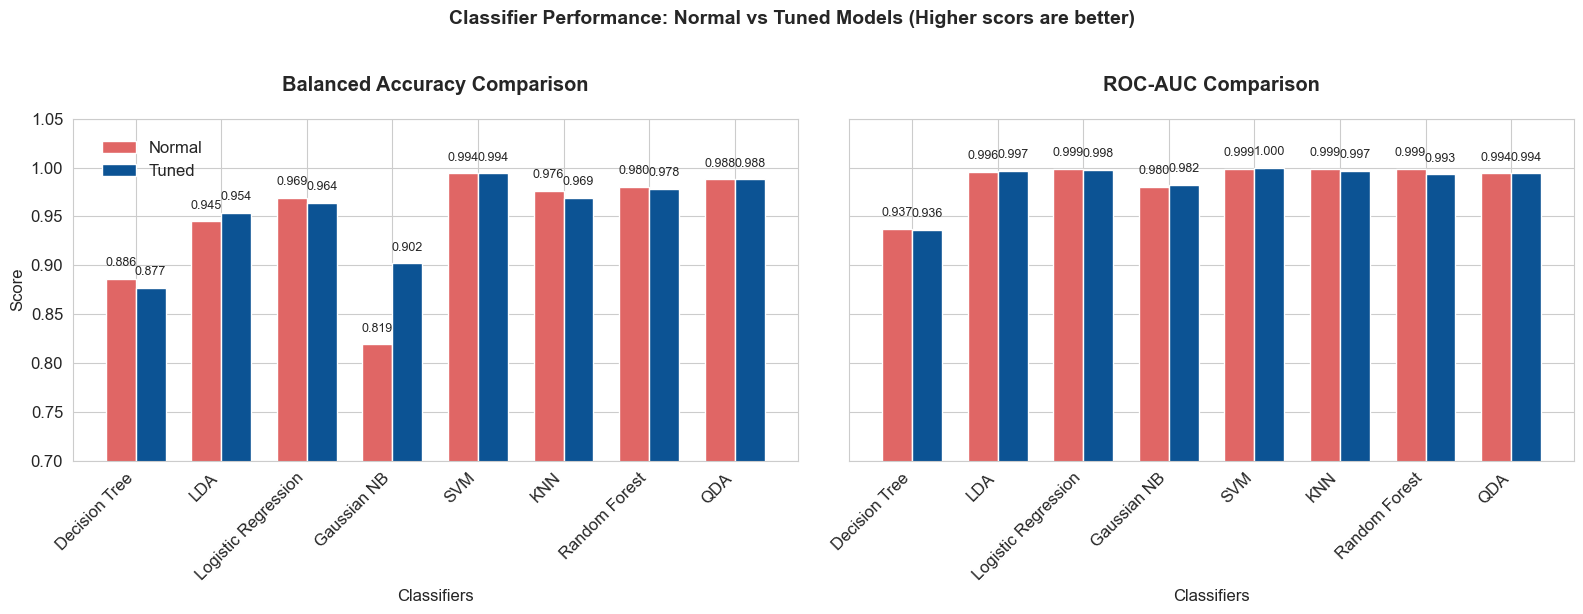

<Figure size 640x480 with 0 Axes>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define classifiers and metrics
classifiers = [
    "Decision Tree", "LDA", "Logistic Regression", "Gaussian NB",
    "SVM", "KNN", "Random Forest", "QDA"
]

# Performance data
metrics = {
    'Balanced Accuracy': {
        'Normal': [0.886, 0.945, 0.969, 0.819, 0.994, 0.976, 0.980, 0.988],
        'Tuned': [0.877, 0.954, 0.964, 0.902, 0.994, 0.969, 0.978, 0.988]
    },
    'ROC-AUC': {
        'Normal': [0.937, 0.996, 0.999, 0.980, 0.999, 0.999, 0.999, 0.994],
        'Tuned': [0.936, 0.997, 0.998, 0.982, 1.000, 0.997, 0.993, 0.994]
    }
}

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# Plot configuration
x = np.arange(len(classifiers))
width = 0.35
colors = {'Normal': '#e06665', 'Tuned': '#0c5394'}

## Balanced Accuracy Plot ##
for i, (model_type, values) in enumerate(metrics['Balanced Accuracy'].items()):
    offset = width * i
    ax1.bar(x + offset, values, width, label=model_type, color=colors[model_type])
    ax1.set_title("Balanced Accuracy Comparison", fontweight='bold', pad=20)
    ax1.set_xticks(x + width/2)
    ax1.set_xticklabels(classifiers, rotation=45, ha='right')
    ax1.set_ylim(0.7, 1.05)
    
    # Add data labels
    for j, val in enumerate(values):
        ax1.text(j + offset, val + 0.01, f"{val:.3f}", 
                ha='center', va='bottom', fontsize=9)

## ROC-AUC Plot ##
for i, (model_type, values) in enumerate(metrics['ROC-AUC'].items()):
    offset = width * i
    ax2.bar(x + offset, values, width, label=model_type, color=colors[model_type])
    ax2.set_title("ROC-AUC Comparison", fontweight='bold', pad=20)
    ax2.set_xticks(x + width/2)
    ax2.set_xticklabels(classifiers, rotation=45, ha='right')
    ax2.set_ylim(0.7, 1.05)
    
    # Add data labels
    for j, val in enumerate(values):
        ax2.text(j + offset, val + 0.01, f"{val:.3f}", 
                ha='center', va='bottom', fontsize=9)

# Common elements
ax1.set_ylabel("Score", fontsize=12)
ax1.set_xlabel("Classifiers", fontsize=12)
ax2.set_xlabel("Classifiers", fontsize=12)
ax1.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=False)
ax2.legend().set_visible(False)

plt.suptitle("Classifier Performance: Normal vs Tuned Models (Higher scors are better)", 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig("classifier_comparison_improved.png", dpi=300, bbox_inches='tight')
plt.show()

plt.tight_layout()
plt.savefig("classifier_comparison.png", dpi=300)  # Save with 300 DPI for high resolution
plt.show()
